## Assignment


1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [1]:
%load_ext nb_black

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns

from sqlalchemy import create_engine

from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize

import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera, normaltest, boxcox

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()


<IPython.core.display.Javascript object>

In [2]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<IPython.core.display.Javascript object>

In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<IPython.core.display.Javascript object>

In [4]:
df["math score"] = df["math score"].replace(0, np.nan)

<IPython.core.display.Javascript object>

In [5]:
df = df.dropna()
df.describe()

,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,66.155155,69.221221,68.112112
std,15.025594,14.513766,15.091685
min,8.000000,23.000000,15.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


<IPython.core.display.Javascript object>

**1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?**

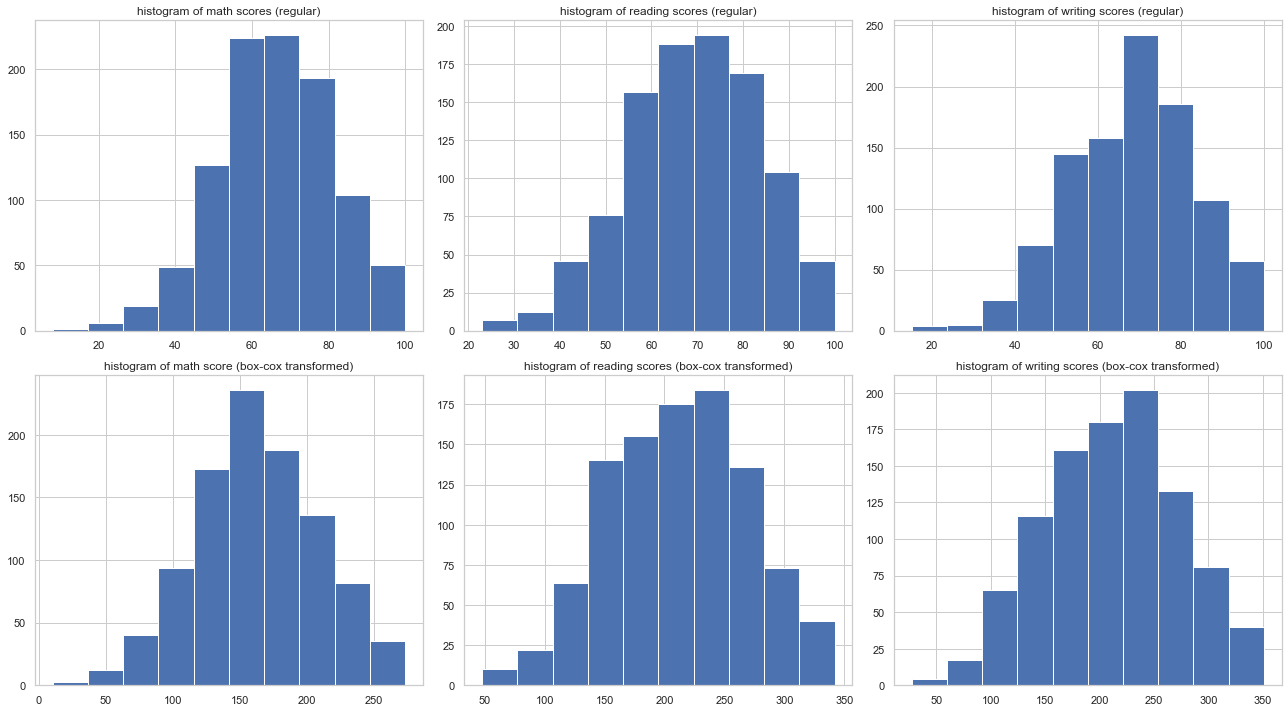

<IPython.core.display.Javascript object>

In [6]:
math_boxcox, _ = boxcox(df["math score"])
reading_boxcox, _ = boxcox(df["reading score"])
writing_boxcox, _ = boxcox(df["writing score"])

plt.figure(figsize=(18, 10))

# histograms of the box-cox transformed data
plt.subplot(2, 3, 1)
plt.hist(df["math score"])
plt.title("histogram of math scores (regular)")

plt.subplot(2, 3, 2)
plt.hist(df["reading score"])
plt.title("histogram of reading scores (regular)")

plt.subplot(2, 3, 3)
plt.hist(df["writing score"])
plt.title("histogram of writing scores (regular)")

plt.subplot(2, 3, 4)
plt.hist(math_boxcox)
plt.title("histogram of math score (box-cox transformed)")

plt.subplot(2, 3, 5)
plt.hist(reading_boxcox)
plt.title("histogram of reading scores (box-cox transformed)")

plt.subplot(2, 3, 6)
plt.hist(writing_boxcox)
plt.title("histogram of writing scores (box-cox transformed)")

plt.tight_layout()

plt.show()

In [7]:
jb_stats = jarque_bera(df["math score"])
norm_stats = normaltest(df["math score"])

print(
    "Jarque-Bera test statistics is {0} and p value is {1}".format(
        jb_stats[0], jb_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1}".format(
        norm_stats[0], norm_stats[1]
    )
)

jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print(
    "Jarque-Bera test statistics is {0} and p value is {1}".format(
        jb_stats[0], jb_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1}".format(
        norm_stats[0], norm_stats[1]
    )
)

jb_stats = jarque_bera(df["reading score"])
norm_stats = normaltest(df["reading score"])

print(
    "Jarque-Bera test statistics is {0} and p value is {1}".format(
        jb_stats[0], jb_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1}".format(
        norm_stats[0], norm_stats[1]
    )
)

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print(
    "Jarque-Bera test statistics is {0} and p value is {1}".format(
        jb_stats[0], jb_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1}".format(
        norm_stats[0], norm_stats[1]
    )
)

jb_stats = jarque_bera(df["writing score"])
norm_stats = normaltest(df["writing score"])

print(
    "Jarque-Bera test statistics is {0} and p value is {1}".format(
        jb_stats[0], jb_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1}".format(
        norm_stats[0], norm_stats[1]
    )
)

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print(
    "Jarque-Bera test statistics is {0} and p value is {1}".format(
        jb_stats[0], jb_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1}".format(
        norm_stats[0], norm_stats[1]
    )
)

Jarque-Bera test statistics is 7.673084457642435 and p value is 0.02156804993927408
Normality test statistics is 7.661032525153018 and p value is 0.021698410660350574
Jarque-Bera test statistics is 1.7200982636836308 and p value is 0.42314129209599327
Normality test statistics is 1.8323075851586939 and p value is 0.4000547794685686
Jarque-Bera test statistics is 9.776353497445086 and p value is 0.007535148427256777
Normality test statistics is 9.673376920700841 and p value is 0.007933281978037242
Jarque-Bera test statistics is 4.8891540799411395 and p value is 0.08676282434883942
Normality test statistics is 6.546500254297637 and p value is 0.03788310187455936
Jarque-Bera test statistics is 11.587461259316736 and p value is 0.003046595230866145
Normality test statistics is 11.43053575430092 and p value is 0.0032952676764974485
Jarque-Bera test statistics is 5.762346713079429 and p value is 0.05606893537015201
Normality test statistics is 8.018367650263817 and p value is 0.0181482012996

<IPython.core.display.Javascript object>

In all cases, the scores were more normally distributed after the Box-Cox transformation was applied at p < 0.05 for the Jarque-Bera test.

**2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.**

In [8]:
df["wt_exam_scr"] = (df["math score"] + df["writing score"] + df["reading score"]) / 3

<IPython.core.display.Javascript object>

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,wt_exam_scr
0,female,group B,bachelor's degree,standard,none,72.0,72,74,72.666667
1,female,group C,some college,standard,completed,69.0,90,88,82.333333
2,female,group B,master's degree,standard,none,90.0,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57,44,49.333333
4,male,group C,some college,standard,none,76.0,78,75,76.333333


<IPython.core.display.Javascript object>

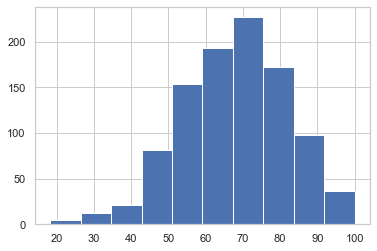

<IPython.core.display.Javascript object>

In [10]:
plt.hist(df["wt_exam_scr"])
plt.show()

In [11]:
jb_stats = jarque_bera(df["wt_exam_scr"])
norm_stats = normaltest(df["wt_exam_scr"])

print(
    "Jarque-Bera test statistics is {0} and p value is {1}".format(
        jb_stats[0], jb_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1}".format(
        norm_stats[0], norm_stats[1]
    )
)

Jarque-Bera test statistics is 10.345394363749879 and p value is 0.0056692571616785425
Normality test statistics is 10.127189207749474 and p value is 0.006322790687068094


<IPython.core.display.Javascript object>

The weighted exam scores are not normally distributed at p<0.01.  Applying Box-Cox...

In [12]:
wt_scr_boxcox, _ = boxcox(df["wt_exam_scr"])

<IPython.core.display.Javascript object>

In [13]:
jb_stats = jarque_bera(wt_scr_boxcox)
norm_stats = normaltest(wt_scr_boxcox)

print(
    "Jarque-Bera test statistics is {0} and p value is {1}".format(
        jb_stats[0], jb_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1}".format(
        norm_stats[0], norm_stats[1]
    )
)

Jarque-Bera test statistics is 3.4323846909111793 and p value is 0.17974926966382276
Normality test statistics is 4.219879978703656 and p value is 0.12124524222064059


<IPython.core.display.Javascript object>

The weighted exam scores are now more normally distributed after the Box-Cox transformation.

**3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?**

In [14]:
df = df.drop(columns=["math score", "reading score", "writing score"])

<IPython.core.display.Javascript object>

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,wt_exam_scr
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


<IPython.core.display.Javascript object>

In [16]:
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

<IPython.core.display.Javascript object>

In [17]:
# change gender to numeric
df["gender"] = df["gender"].str.replace("female", "1")
df["gender"] = df["gender"].str.replace("male", "0")
df["gender"] = pd.to_numeric(df["gender"])

<IPython.core.display.Javascript object>

In [18]:
# change parental education to numeric
edu_map = {
    "some high school": 1,
    "high school": 2,
    "some college": 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6,
}
df[["parental level of education"]] = df[["parental level of education"]].replace(
    edu_map
)

<IPython.core.display.Javascript object>

In [19]:
# change test prep to numeric
df["test preparation course"] = df["test preparation course"].str.replace(
    "completed", "1"
)
df["test preparation course"] = df["test preparation course"].str.replace("none", "0")
df["test preparation course"] = pd.to_numeric(df["test preparation course"])

<IPython.core.display.Javascript object>

In [20]:
# change lunch to numeric
df["lunch"] = df["lunch"].str.replace("free/reduced", "1")
df["lunch"] = df["lunch"].str.replace("standard", "0")
df["lunch"] = pd.to_numeric(df["lunch"])

<IPython.core.display.Javascript object>

In [21]:
# create dummy variables for race/ethnicity
df = pd.concat([df, pd.get_dummies(df["race/ethnicity"], drop_first=True)], axis=1)
df = df.drop(columns=["race/ethnicity"])

<IPython.core.display.Javascript object>

In [22]:
df.head()

,gender,parental level of education,lunch,test preparation course,wt_exam_scr,group B,group C,group D,group E
0,1,5,0,0,72.666667,1,0,0,0
1,1,3,0,1,82.333333,0,1,0,0
2,1,6,0,0,92.666667,1,0,0,0
3,0,4,1,0,49.333333,0,0,0,0
4,0,3,0,0,76.333333,0,1,0,0


<IPython.core.display.Javascript object>

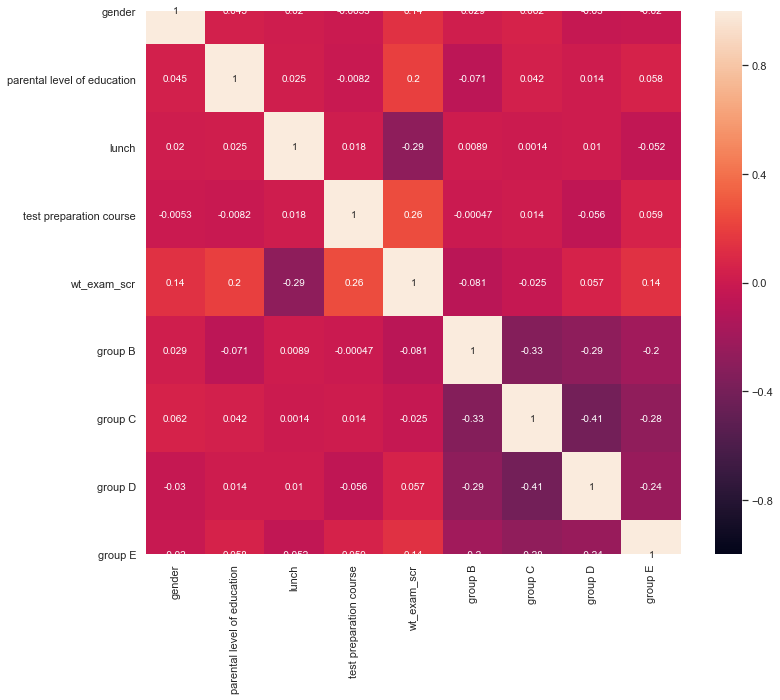

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

The features that correlate most to the weighted exam scores are lunch, test preparation course, and parental level of education.